In [1]:
from read_tiles import TissueDataset, save_color_normalization_values, load_color_normalization_values
import h5py
import json
import os
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt

In [2]:
HDF5_FOLDER = '/media/nico/data/fourthbrain/project/output_CAMELYON16/'

In [3]:
train_data = TissueDataset(HDF5_FOLDER,  percentage=1.0, first_part=False)
# val_data = TissueDataset(path=HDF5_FILE, percentage=0.5, first_part=False)

In [4]:
x, _ = train_data.get_batch(num_neg=5000, num_pos=2500)

In [5]:
list_r, list_g, list_b = list(), list(), list()
for np_img in x: 
    list_r.append(np_img[:, :, 0])
    list_g.append(np_img[:, :, 1])
    list_b.append(np_img[:, :, 2])

In [6]:
r = np.concatenate(list_r).flatten()
g = np.concatenate(list_g).flatten()
b = np.concatenate(list_b).flatten()

In [7]:
mean=[r.mean(), g.mean(), b.mean()]
std=[r.std(), g.std(), b.std()]

In [8]:
print("mean: {}, std={}".format(mean, std))

mean: [0.7634849665144396, 0.6335899433689473, 0.7117672955282406], std=[0.2279336724382847, 0.2852342064450863, 0.2277654582192828]


In [9]:
save_color_normalization_values(mean, std, filename="CAMELYON16_color_normalization.json")

In [10]:
mean, std = load_color_normalization_values("CAMELYON16_color_normalization.json")

(2, 256, 256, 3)


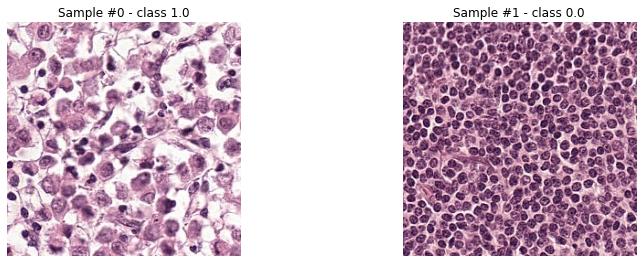

In [11]:
plt.figure(figsize=(12,4))

itera = train_data.generator(num_neg=1, num_pos=1, data_augm=True, color_normalization_file=None)
for x, y in itera:
    print(x.shape)
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{} - class {}'.format(i, y[i]))
        ax.imshow(x[i])
        ax.axis('off') 
    break # generate yields infinite random samples, so we stop after first

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2, 256, 256, 3)


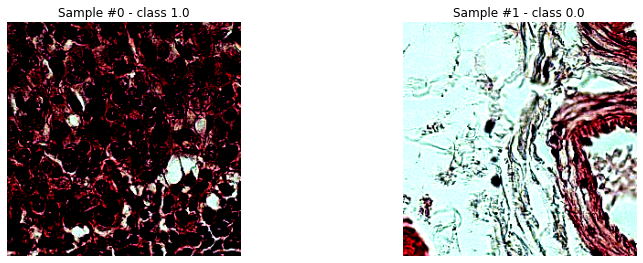

In [12]:
plt.figure(figsize=(12,4))

itera = train_data.generator(num_neg=1, num_pos=1, data_augm=True)
for x, y in itera:
    print(x.shape)
    for i in range(2):
        ax = plt.subplot(1, 2, i + 1)
        plt.tight_layout()
        ax.set_title('Sample #{} - class {}'.format(i, y[i]))
        ax.imshow(x[i])
        ax.axis('off') 
    break # generate yields infinite random samples, so we stop after first